# Create a model to identify/predict whether the client has subscribed a term deposit or not

In [89]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir("/home/prathikm/Desktop/ds_assignments/doing/logistic_regression")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [44]:
df2 = pd.read_csv("bank-full-kg.csv")#,sep=';')
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Working on Data Exploration

In [46]:
df2.columns #checking column names

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [53]:
df2.shape #size of dataset

(45211, 17)

In [49]:
df2.nunique() #how many unique values in each column

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [54]:
df2.isnull().sum() #is there null values?

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [55]:
df2.isna().sum() #is there na values?

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [56]:
df2.info() #combined info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [58]:
df2.select_dtypes("object") #select object datatypes only

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [ ]:
#Out of these "default","housing" and "loan" are already yes,no OR 2 values

In [57]:
df2['job'].value_counts() #what values does job have?

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

# Separate the columns for each category value using one-hot encoding

In [62]:
df = pd.get_dummies(df2,columns=['job','marital','education','contact','poutcome','month'])
pd.set_option("display.max.columns", None) #display all columns
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [63]:
#Out of these "default","housing" and "loan" are already yes,no OR 2 values. 
#So convert them to binary values including for y as well

In [64]:
df['default'] #picking first default column

0        no
1        no
2        no
3        no
4        no
         ..
45206    no
45207    no
45208    no
45209    no
45210    no
Name: default, Length: 45211, dtype: object

In [66]:
df['default'] = np.where(df['default'].str.contains("yes"),1,0) #replace the yes and no with 0 and 1 for default column

In [67]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,yes,no,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,yes,yes,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,yes,no,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,no,no,17,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,no,no,17,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,no,no,17,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,no,no,17,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [75]:
df['housing'] = np.where(df['housing'].str.contains("yes"), 1, 0)
df['loan'] = np.where(df['loan'].str.contains("yes"), 1, 0)
df['Target'] = np.where(df['Target'].str.contains("yes"), 1, 0) #do the same for all above columns mentioned

In [76]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  Target               45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

# Model

In [78]:
#For LR - divide the dataset to x and y

In [79]:
x = pd.concat([df.iloc[:,0:10],df.iloc[:,11:]],axis=1)
y = df.iloc[:,10]

In [80]:
classifier = LogisticRegression()
classifier.fit(x,y) #call object and fit model

/home/prathikm/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Prediction of x data

In [81]:
y_cap=classifier.predict(x)
y_cap

array([0, 0, 0, ..., 1, 0, 0])

In [82]:
y_pred =pd.DataFrame({'actual_y':y,'predicted_y':y_cap}) #conversion to dataframe
y_pred

,actual_y,predicted_y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [84]:
confusion_matrix = confusion_matrix(y,y_cap)
confusion_matrix

array([[39157,   765],
       [ 4133,  1156]])

In [87]:
(39157+1156)/(39157+765+1156+4133)*100

89.16635332109443

# Accuracy is 89.166%

In [90]:
#Classification report
print(classification_report(y,y_cap))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

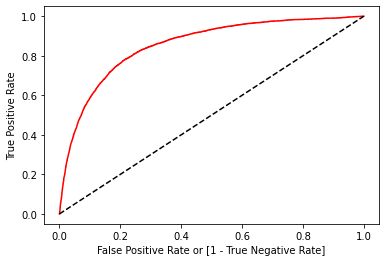

In [91]:
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])
auc = roc_auc_score(y, y_cap)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [92]:
auc

0.59970223510813

# AUC value is 0.599